In [1]:
from PauLisa import *

n\m [0, 1, 2, 3]
0   [0, 0, 0, 0]
1   [1, 0, 0, 0]
2   [0, 0, 0, 0]
3   [0, 0, 0, 0]


Intensity


C:\Users\edwar\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


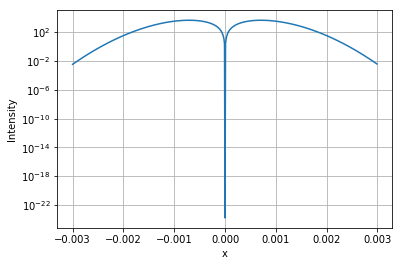

In [2]:
IntensitySlice(0)